In [1]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import csv
from pprint import pprint


In [5]:
search_words_combined = []
with open("words/combined.csv") as combined:
    reader = csv.reader(combined)
    for row in reader:
        search_words_combined = row
        
search_words_insults = []
with open("words/insults.csv") as insults:
    reader = csv.reader(insults)
    for row in reader:
        search_words_insults = row
        
print(search_words_insults)

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

driver = webdriver.Chrome()

def get_page_count(driver, search_tag:str):
    
    driver.get(f"https://keskustelu.suomi24.fi/haku?keyword=\"{search_tag}\"")
    
    try:
        page_count = driver.find_element_by_xpath("/html/body/div[2]/div[2]/div[2]/div/div[3]/div[2]/div[2]/div/div/div/p/span")
        return page_count.get_attribute('innerHTML') 
    except Exception:
        return 0
                                                
word_page_dict = {}
for word in search_words_combined:
    word_page_dict[word] = get_page_count(driver, word)


driver.quit()

['ääliö', 'idiootti', 'neekeri', 'homo', 'vammainen', 'hintti', 'hakata', 'tappaa', 'maahanmuuttaja', 'piestä', 'matu', 'huora', 'nainen', 'partalapsi', 'ryssä', 'pelle', 'lesbo', 'kehari', 'juntti', 'runkkari']


/home/syomasa/.conda/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:27: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead


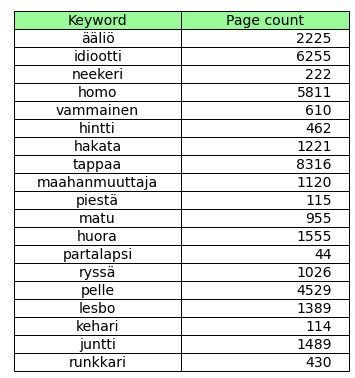

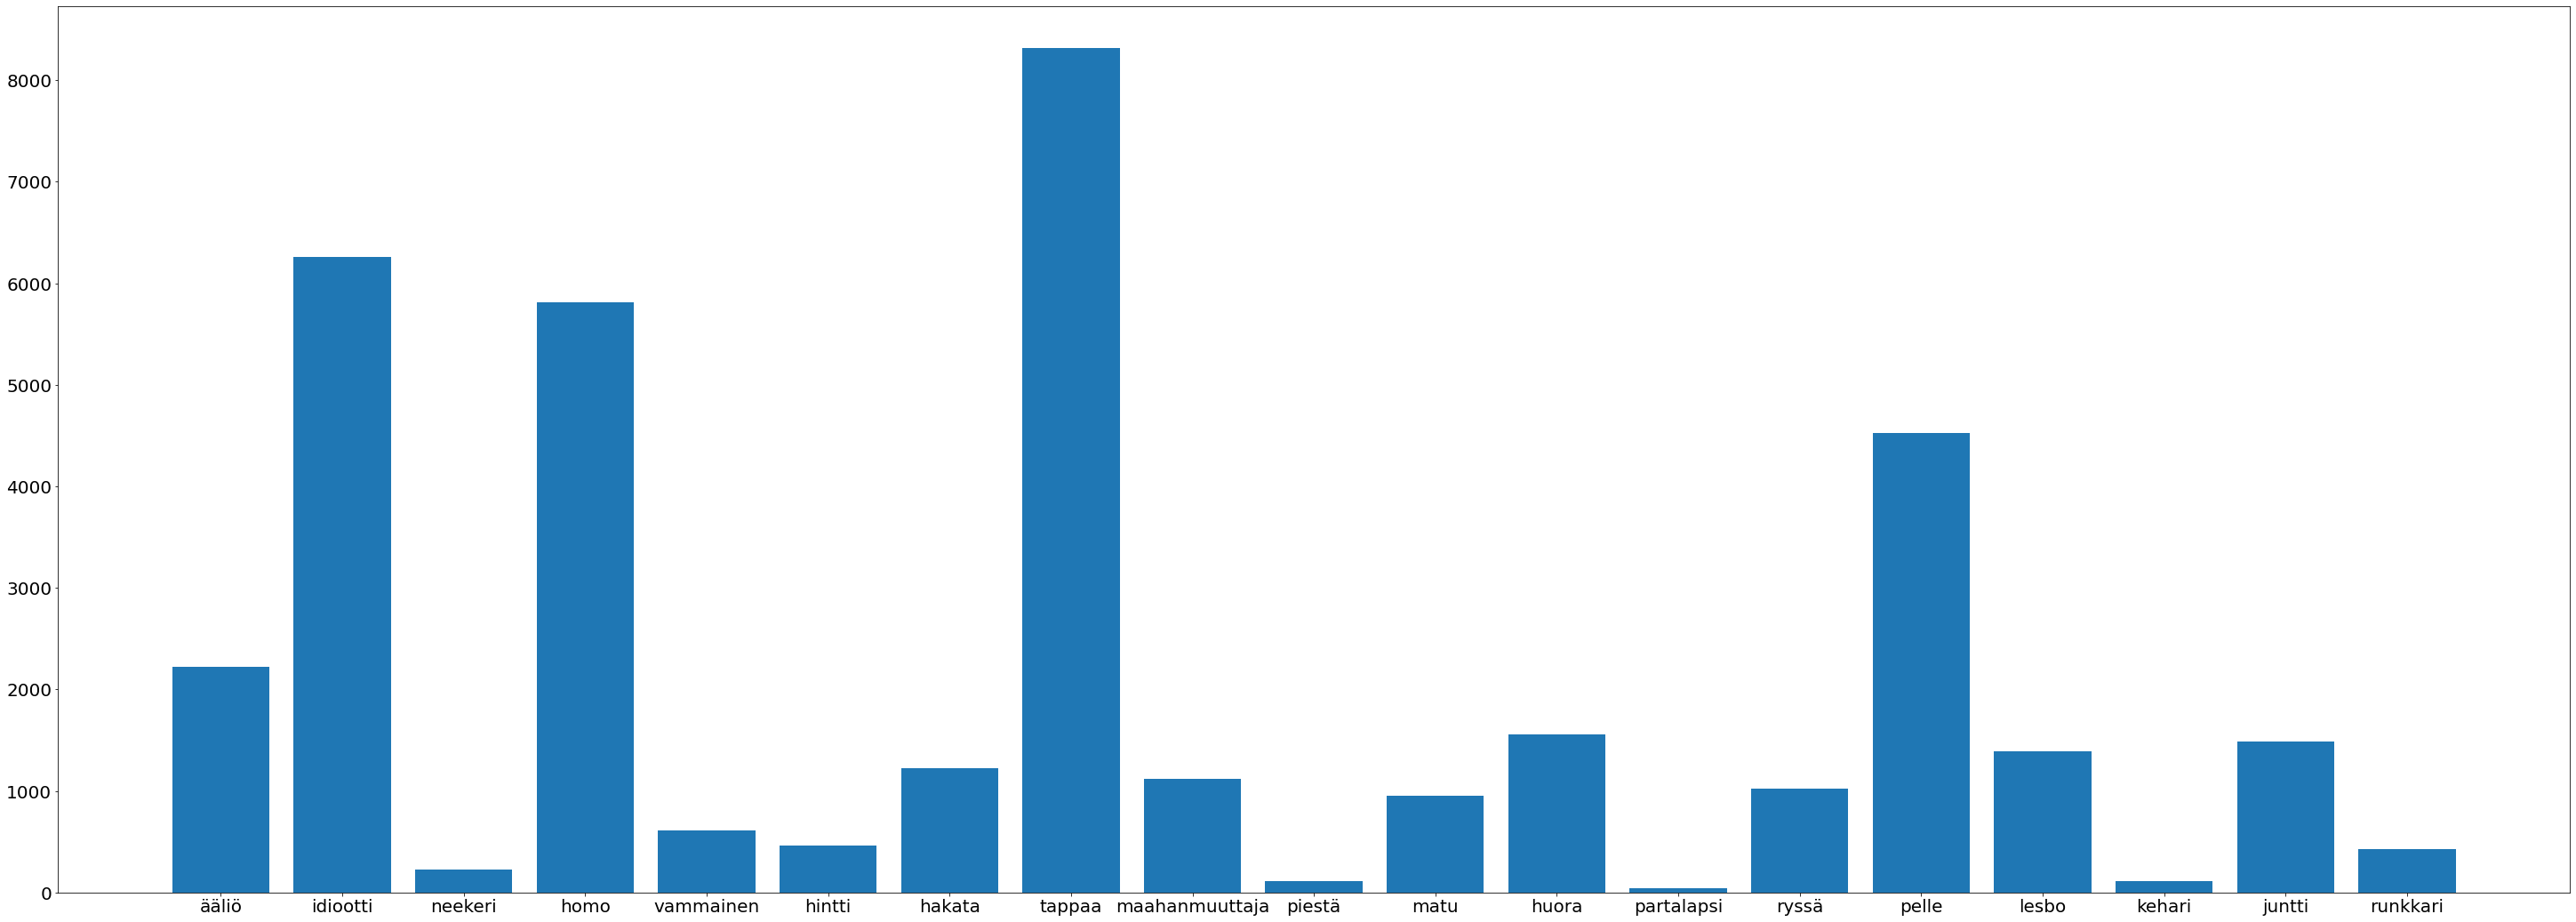

In [36]:
# Labels
labels_insults = search_words_insults
#.remove("nainen")

# Get data from dict
#labels_insults.remove("nainen")
data_insults = []
#fig, ax = plt.subplots(figsize=(40, 20))
cols = ("Keyword", "Page count")
cell_txts = []
fig, ax = plt.subplots()
for label in labels_insults:
    data_insults.append(int(word_page_dict[label]))
    cell = [label, int(word_page_dict[label])]
    cell_txts.append(cell)

table = ax.table(cellText=cell_txts, colLabels=cols, loc="upper left", colLoc="center", colColours=["palegreen"]*2)

# Hide axes, ticks and tick labels for table
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Change fontsize and increase padding
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1, 1.5)

# Change cells style for keywords
for i in range(len(labels_insults)+1):
    cell = table[i, 0]
    cell.set_text_props(ha="center")
    

#plt.title("Keywords and matches -table")
plt.show()

# Plot
fig, ax = plt.subplots(figsize=(40, 20)) 
ax.bar(labels_insults, data_insults)
fig.tight_layout()
fig.subplots_adjust(bottom=0.3)
ax.tick_params(labelsize=20) 
#fig.rc('ytick', labelsize=20) 
plt.show()



In [37]:
# Save in pickle

with open("word_dict.pickle", "wb") as fp: 
    import pickle
    pickle.dump(word_page_dict, fp)

68 68


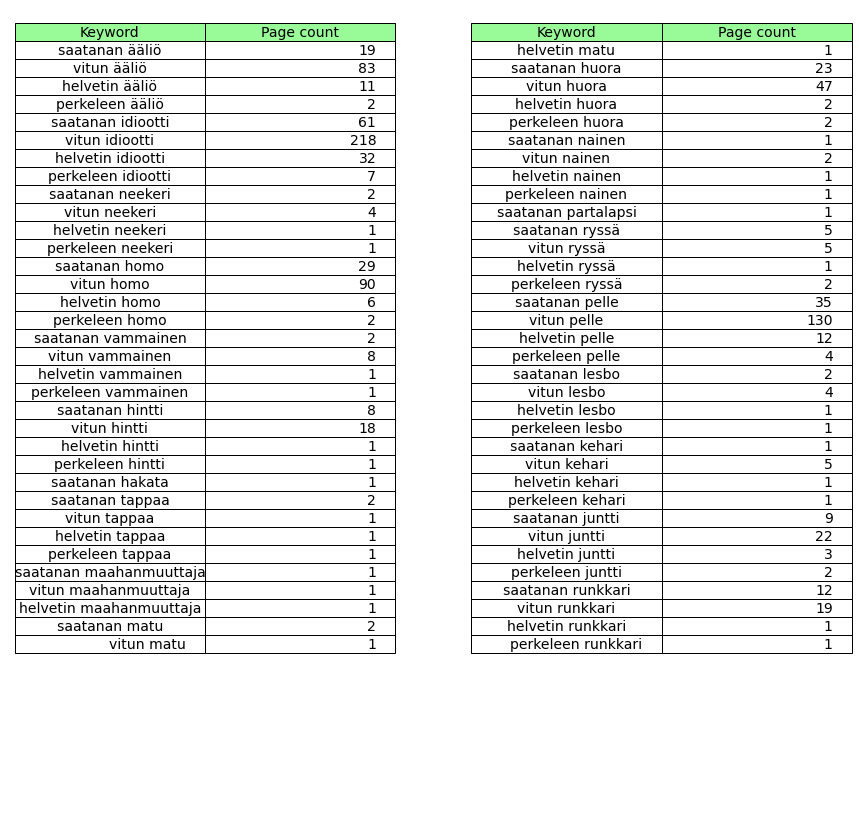

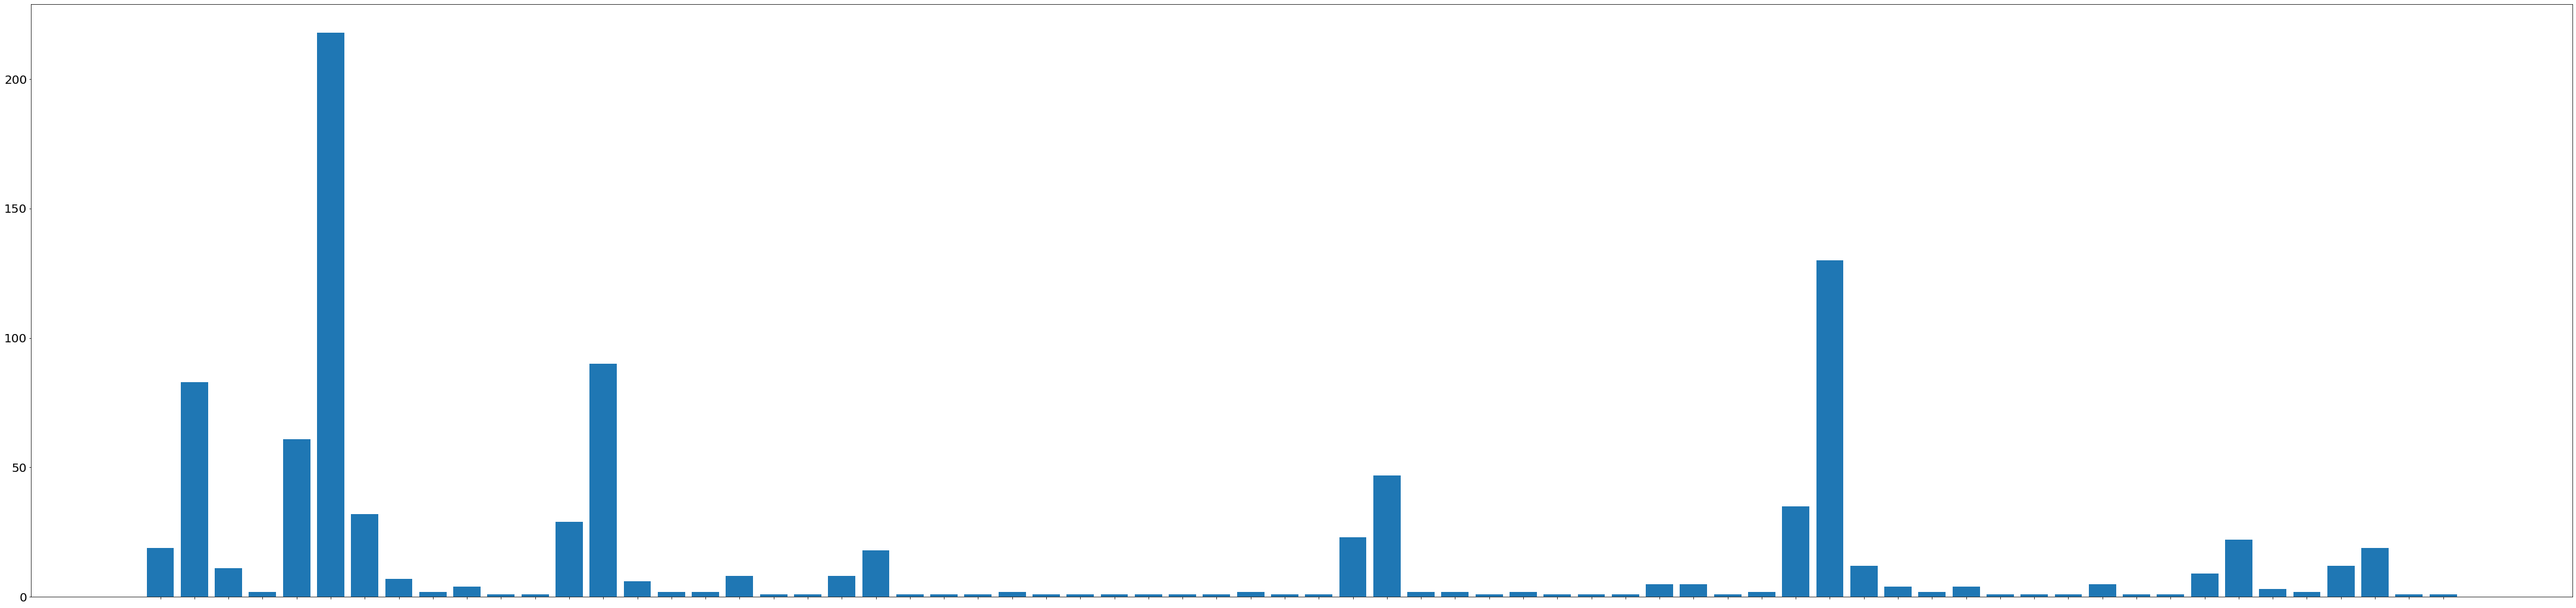

In [80]:
labels_two_words = []
matches = []
for word in search_words_combined:
    word = word.split(" ")
    if len(word) == 2:
        word = " ".join(word)
        if int(word_page_dict[word]) != 0:
            matches.append(int(word_page_dict[word]))
            labels_two_words.append(word)
        
#print(labels_two_words, "\n")
#print(matches)
print(len(labels_two_words), len(matches))



cols = ("Keyword", "Page count")
cell_txts = []
cell_txts1 = []
fig, (ax, ax1) = plt.subplots(1, 2, figsize=(15, 15))
#ax = fig.add_subplot(1, 2, 1)
#ax1 = fig.add_subplot(1, 2, 2)
for i,label in enumerate(labels_two_words):
    #data_insults.append(int(word_page_dict[label]))
    cell = [label, int(word_page_dict[label])]
    if i >= 34:
        cell_txts1.append(cell)
    else:
        cell_txts.append(cell)

table = ax.table(cellText=cell_txts, colLabels=cols, loc="upper left", colLoc="center", colColours=["palegreen"]*2)
table1 = ax1.table(cellText=cell_txts1, colLabels=cols, loc="upper left", colLoc="center", colColours=["palegreen"]*2)

# Hide axes, ticks and tick labels for table
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax1.axes.xaxis.set_visible(False)
ax1.axes.yaxis.set_visible(False)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)

# Change fontsize and increase padding
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1, 1.5)

table1.auto_set_font_size(False)
table1.set_fontsize(14)
table1.scale(1, 1.5)

# Change cells style for keywords
for i in range(int((len(labels_two_words)+1)/2)):
    cell = table[i, 0]
    cell.set_text_props(ha="center")
    
    cell1 = table1[i, 0]
    cell1.set_text_props(ha="center")

#plt.title("Keywords and matches -table")
#fig.tight_layout()
plt.show()

# Plot
fig, ax = plt.subplots(figsize=(60, 20)) 
ax.bar(labels_two_words, matches)
fig.tight_layout()
fig.subplots_adjust(bottom=0.3)
ax.tick_params(labelsize=20)
ax.axes.xaxis.set_ticklabels([])
ax.spines["bottom"].set_visible(True)
#fig.rc('ytick', labelsize=20) 
plt.show()

        

In [4]:
# Combine insulting words with swear words
# run only if combined.csv is missing

insults_arr = []
swears_arr  = None
with open("words/insults.txt") as insults:
    reader = csv.reader(insults)
    for row in reader:
        insults_arr = row
            
insults_arr2 = []
for word in insults_arr:
    if word.startswith("_"):
        word = word[1:len(word)]
    insults_arr2.append(word)

insults_arr = insults_arr2
with open("words/insults.csv", "w") as insults_csv:
    filewriter = csv.writer(insults_csv, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    filewriter.writerow(insults_arr)
    
print(insults_arr)

with open("words/swears.txt") as swears:
    reader = csv.reader(swears)
    for row in reader:
        swears_arr = row
        
combined_arr = []
with open("words/combined.csv", 'w') as comb:
    filewriter = csv.writer(comb, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for insult in insults_arr:
        for swear in swears_arr:
            combined_word = swear + " " + insult
            combined_arr.append(combined_word)
        combined_arr.append(insult)
    filewriter.writerow(combined_arr)
    #pprint(combined_arr)
    

['ääliö', 'idiootti', 'neekeri', 'homo', 'vammainen', 'hintti', 'hakata', 'tappaa', 'maahanmuuttaja', 'piestä', 'matu', 'huora', 'nainen', 'partalapsi', 'ryssä', 'pelle', 'lesbo', 'kehari', 'juntti', 'runkkari']


In [1]:
import os
import gzip
import time

from s24_data_reader.split_data import read_documents

def file_reader(path):
    with gzip.open(path, "rt", encoding="utf-8") as f: 
        for doc in read_documents(f):
            if doc:
                doc = "\n".join(doc)
                doc = doc.replace("****TEXT ENDS HERE****", "")
                doc = doc.strip()
                meta, txt = doc.split("****TEXT STARTS HERE****\n")
                meta = meta.replace("###C: ", "")
                meta = meta.split("\n")
                #meta = meta.split("\n")
                yield meta, txt
                
class Document:
    def __init__(self, meta, txt):
        self.meta = meta
        self.txt = txt
        
    def get_type(self):
        return self.meta[14].split("=")[1].strip()
    
    def get_doc_id(self):
        return int(self.meta[0].split("=")[1])
    
    def get_author(self):
        #return self.meta[5].split("=")[1].strip()
        return self.meta[5]
    
    def get_txt(self):
        return self.txt
    
    def get_category(self):
        return self.meta[16].split("=")[1].strip()
    
    def __str__(self):
        return f"Document({self.meta[0]}, {self.meta[14]}, {self.meta[16]})"
    
    def __repr__(self):
        return f"Document({self.meta[0]}, {self.meta[14]}, {self.meta[16]})"     
        
class Thread:
    def __init__(self, thread_id=None, thread_start=None):
        self.thread_start = thread_start
        self.id = thread_id
        self.comments = []
        
    def get_start(self):
        return self.thread_start
    
    def get_comments(self):
        return self.comments
    
    def add_comment(self, comment):
        self.comments.append(comment)
    
    def get_id(self):
        return self.id
        
    def get_all(self):
        tmp = self.comments
        tmp.insert(0, self.thread_start)
        return tmp
        
    def __str__(self):
        return f"Thread(id={self.id}, thread_start={self.thread_start}, comment_len = {len(self.comments)})"
    
    def __repr__(self):
        return f"Thread(id={self.id}, thread_start={self.thread_start}, comment_len = {len(self.comments)})"
    
    def __eq__(self, thread2):
        return self.id == thread2.id
    
    def __gt__(self, thread2):
        return self.id > thread2.id
    
    def __ge__(self, thread2):
        return self.id >= thread2.id
    
    def __lt__(self, thread2):
        return self.id < thread2.id
    
    def __le__(self, thread2):
        return self.id <= thread2
        
def construct_file_paths(folder_path):
    files = os.listdir(folder_path)
    paths = [os.path.join(folder_path, i) for i in files]
    return paths


thread_id = 1
def get_threads(file_name):
    #threads = []
    t = Thread()
    global thread_id
    for meta, txt in file_reader(file_name):
        # indeksi kentta
        # 16      kategoria
        # 14      tyyppi
        # 0       documentin id
        doc = Document(meta, txt)
        
        if doc.get_type() == "thread_start" and t.get_start() != None:
            yield t

        if doc.get_type() == "thread_start":
            t = Thread(thread_id, doc)
            thread_id += 1
        elif t.get_start() == None:
            continue
        else:
            t.add_comment(doc)


In [2]:
import csv
import pickle


with open("words/kategoriat.csv", "r") as csv_file:
    content = csv.reader(csv_file)
    for row in content:
        content = row

with open("words/insults.csv", "r") as csv_file2:
    reader = csv.reader(csv_file2)
    for row in reader:
        insults = row
        
def filter_data(paths):
    for path in paths:
        for thread in get_threads(path):
            doc = thread.get_start()
            category = doc.get_category()
            if category in content:
                yield thread

def parse_hits(paths, word_list, chunk_size=None, threshold=1):
    matches = {}
    nodes = []
    for word in word_list:
        matches[word] = []
        
    for thread in filter_data(paths):
        for word in word_list:
            occurences = 0
            for doc in thread.get_all():
                txt = doc.get_txt().split(" ")
                if len(nodes) == chunk_size:
                    yield matches, nodes
                    matches = {new_list: [] for new_list in word_list}
                    nodes = []
                occurences += txt.count(word)
                if occurences >= threshold:
                    matches[word].append(thread)
                    if thread.get_id() not in nodes:
                        nodes.append(thread.get_id())
                    break
    yield matches, nodes
    
                

In [4]:
# Create pickle of object we are working with

for year in range(2017, 2018):
    
    paths = construct_file_paths(f"data/{year}/")
    part = 0
    for matches, nodes in parse_hits(paths, insults, chunk_size=1000, threshold=3):
        with open(f"data/pickles/{year}_part{part}.pickle", "wb") as f:
            print(f"Creating file: data/pickles/{year}_part{part}.pickle")
            pickle.dump((matches, nodes), f)
        part += 1
    
    print(f"Finished year: {year}")
    #obj1 = parse_hits(paths1, insults)

    #print("nodes:", len(obj[1]))
    2
#    pickle.dump(obj1, f)
    
    #with open(f"data/pickles/{year}.pickle", "wb") as f:
    #    print(f"created file data/pickles/{year}.pickle")
    #    pickle.dump(obj, f)

Creating file: data/pickles/2017_part0.pickle
Creating file: data/pickles/2017_part1.pickle
Finished year: 2017


In [3]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def generate_edges(matches, word):
    generated = []
    for thread in matches[word]:
        doc_id = thread.get_id()
        for thread1 in matches[word][:]:
            doc_id1 = thread1.get_id()
            if doc_id1 != doc_id:
                yield (doc_id, doc_id1)
                
def gen_edges(paths, word):
    for thread in parse_hits():
        doc_id = thread.get_id()
        for thread1 in parse_hits(paths, word):
            doc_id1 = thread1.get_id()
            if doc_id != doc_id1:
                yield (doc_id, doc_id1)
                
def get_data(folder_name):
    files = os.listdir(folder_name)
    for file in files:
        if file == "pickles":
            file_paths = construct_file_paths(f"{folder_name}/{file}")
            for i in file_paths:
                with open(i, "rb") as f:
                    matches, nodes = pickle.load(f)
                    yield matches, nodes
                    
def gen_edges(word):
    pass
    
    
    

start = time.process_time()
G = nx.Graph()
matches_all = {word: [] for word in insults}
for matches, nodes in get_data("data/"):
    #print("Total nodes:", len(nodes))
    for node in nodes:
        G.add_node(node)
    for word in insults:
        matches_all[word] += matches[word]

print(len(G.nodes))
print("Adding nodes and edges took", time.process_time() - start)

for word in insults:
    for edge in generate_edges(matches_all, word):
        G.add_edge(*edge)
#print(len(G.nodes))
#for word in insults:    
#    for edge in generate_edges(matches[word]):
#        G.add_edge(*edge, min_len=10)

8555
Adding nodes and edges took 4.301436883


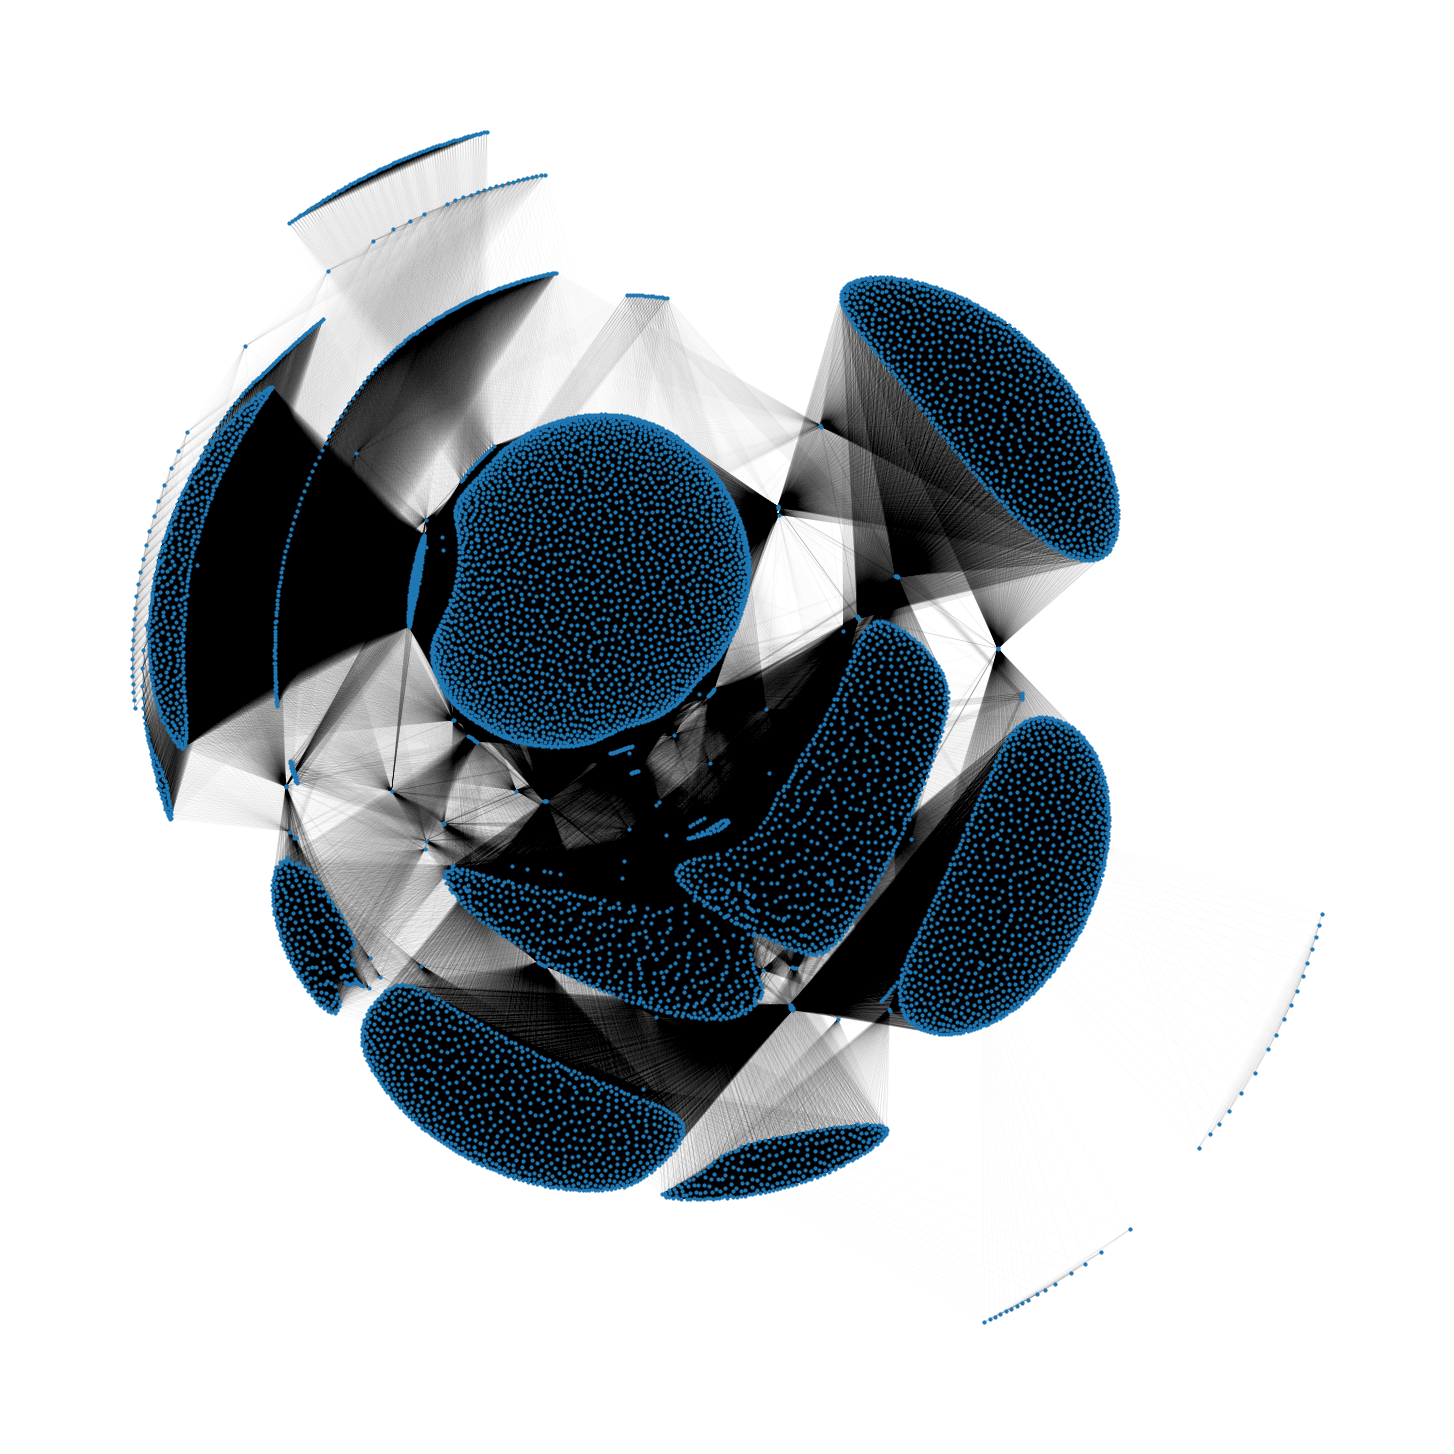

Drawing graph took 320.771554593


In [6]:
start = time.process_time()
plt.figure(3,figsize=(20,20)) 
pos = nx.nx_agraph.graphviz_layout(G)
nx.draw(G, with_labels=False, node_size=10, font_size=5, width=0.01, pos=pos)

#plt.savefig("imgs/graph.svg")
plt.show()
print("Drawing graph took", time.process_time()-start)
#print(G.degree)

In [7]:
print(len(G.edges))

6084186


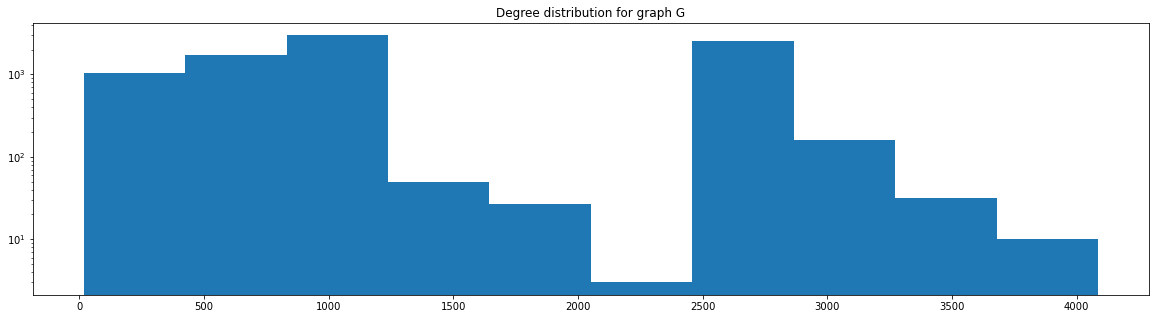

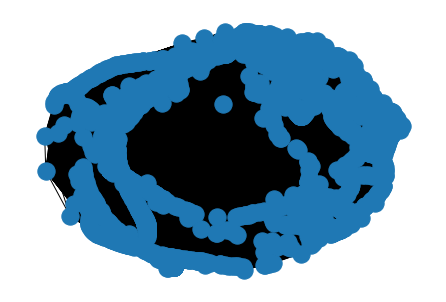

In [4]:
#print("Avg path length:", nx.average_shortest_path_length(G))
#print("Global clustering coefficient:", nx.transitivity(G))
#print("Diameter:", nx.diameter(G))

degrees = [G.degree(n) for n in G.nodes()]

#node_degree_list = sorted(G.degree, key=lambda obj: obj[1])
#nodes, degrees = zip(*node_degree_list)
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(1,1,1)
#plt.yscale("log")
#plt.xscale("log")
ax.set_title("Degree distribution for graph G")
#nodes = [str(i) for i in nodes]
#print(degree_)
ax.hist(degrees, log=True)
#pwl.plot_pdf(degrees, color='red', linewidth=2)
#nodes = [str(i) for i in nodes]
plt.show()

#cliques = list(nx.enumerate_all_cliques(G))

#import networkx.algorithms.community.centrality as c
communities = nx.k_core(G)
nx.draw(communities, with_labels=False)
plt.show()






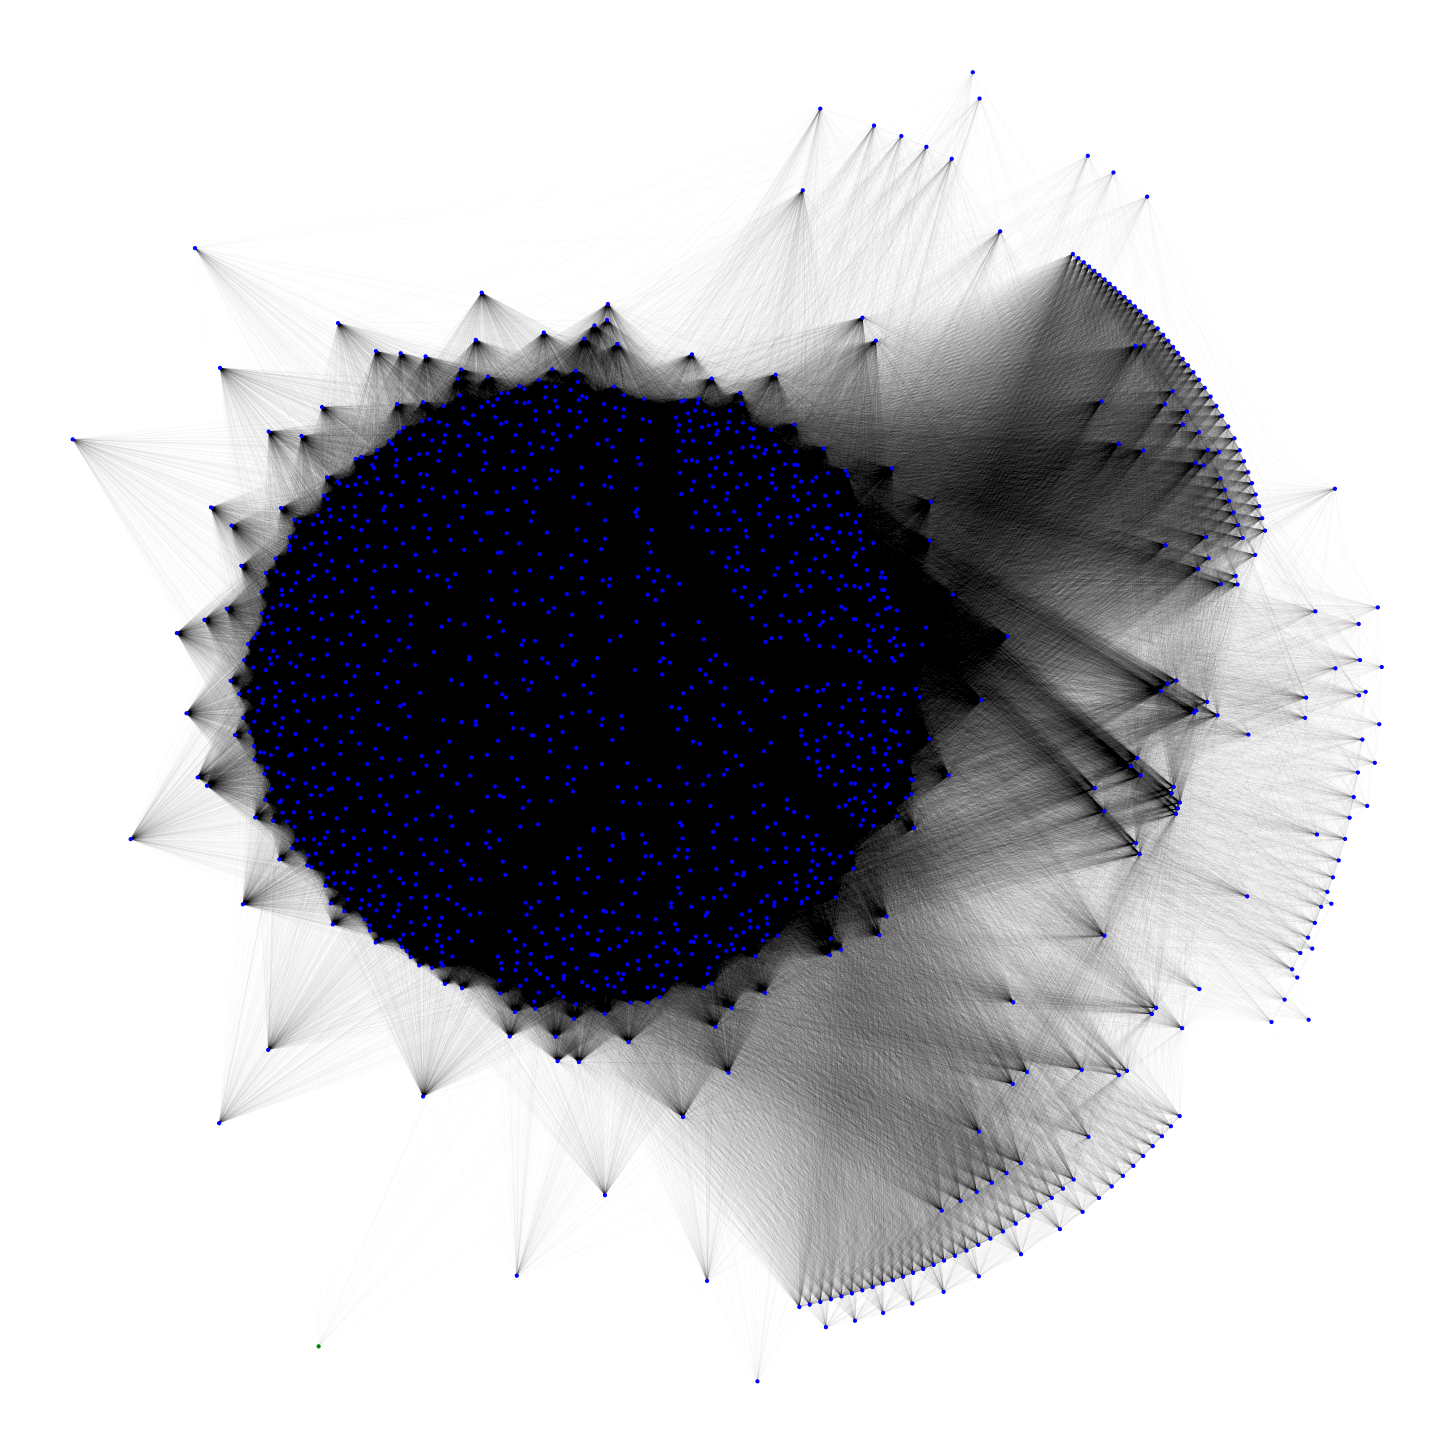

In [13]:
G1 = girvan_newman(G, most_valuable_edge=None)

node_groups = []
for com in next(G1):
    node_groups.append(list(com))


color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('blue')
    else: 
        color_map.append('green')  


plt.figure(3,figsize=(20,20)) 
pos = nx.nx_agraph.graphviz_layout(G)
nx.draw(G, node_color=color_map, with_labels=False, node_size=10, font_size=5, width=0.01, pos=pos)

#plt.savefig("imgs/graph.svg")
plt.show()

In [5]:
print("Avg path length:", nx.average_shortest_path_length(G))
print("Global clustering coefficient:", nx.transitivity(G))
print("Diameter:", nx.diameter(G))
print("Max degree:", max(degrees))
print("Average degree:", sum(degrees)/len(degrees))
print("Total amount of nodes:", len(G.nodes))

Avg path length: 1.9585956553115238
Global clustering coefficient: 0.9737494544752952
Diameter: 4
Max degree: 4086
Average degree: 1422.3696084161309
Total amount of nodes: 8555


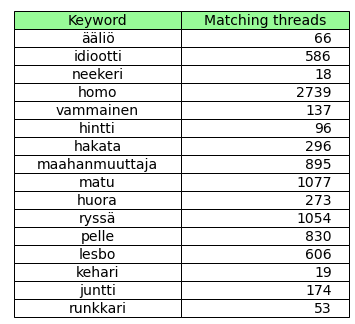

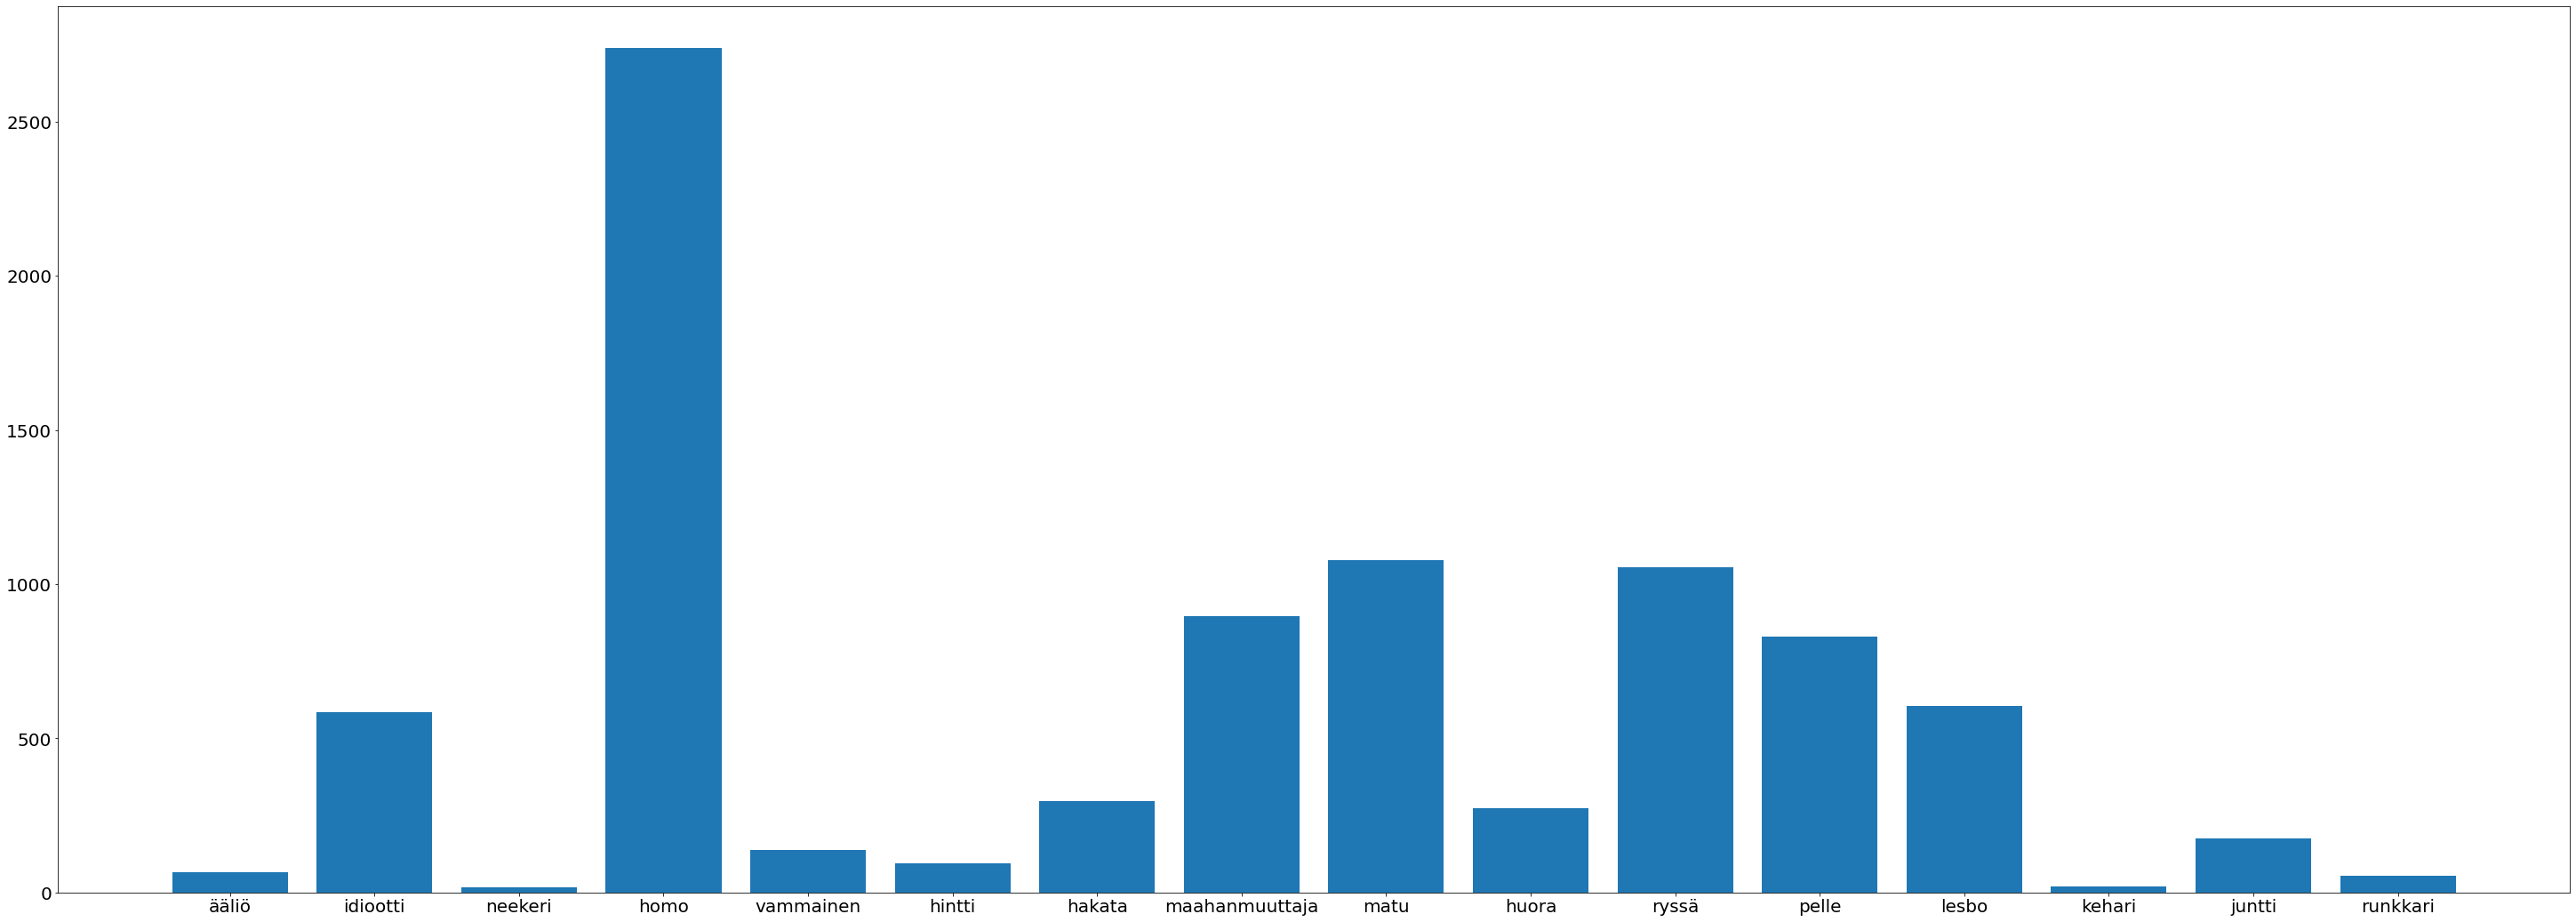

In [7]:
hits = {word: 0 for word in insults}
cols = ("Keyword", "Matching threads")
fig, ax = plt.subplots()
for word in insults:
    for matches, nodes in get_data("data/"):
        matches[word] = np.unique(np.array(matches[word]))
        hits[word] += len(matches[word])
cell_txts = []
data_list = []
for word in insults:
    data_list.append(hits[word])
    cell_txts.append([word, hits[word]])
    
table = ax.table(cellText=cell_txts, colLabels=cols, loc="upper left", colLoc="center", colColours=["palegreen"]*2)

# Hide axes, ticks and tick labels for table
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Change fontsize and increase padding
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1, 1.5)

# Change cells style for keywords
for i in range(len(insults)+1):
    cell = table[i, 0]
    cell.set_text_props(ha="center")
    

#plt.title("Keywords and matches -table")
plt.show()

# Plot
fig, ax = plt.subplots(figsize=(40, 20)) 
ax.bar(list(hits.keys()), list(hits.values()))
fig.tight_layout()
fig.subplots_adjust(bottom=0.3)
ax.tick_params(labelsize=20) 
#fig.rc('ytick', labelsize=20) 
plt.show()

[(1, 4), (4, 1), (2, 4), (4, 3), (2, 1), (4, 3), (1, 2)]


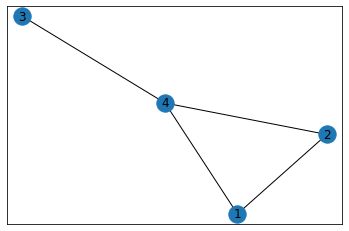

NameError: name 'triangles' is not defined

In [111]:
# Networkx

import networkx as nx
import matplotlib.pyplot as plt
import random

random.seed(10)
NODE_COUNT = 4

G = nx.Graph()
#G.add_edge(1, 2)
G.add_nodes_from(list(range(1, NODE_COUNT)))
edges = [(random.randint(1,NODE_COUNT),random.randint(1,NODE_COUNT)) for i in range(1, 8)]
print(edges)
G.add_edges_from(edges)
nx.draw_networkx(G, with_labels=True)
plt.show()

def calculate_measurements(G):
    degrees = []
    nodes  = []
    
    for node, degree in G.degree:
        #print(node, degree)
        degrees.append(degree)
        nodes.append(node)
    
    max_degree = max(degrees)
    avg_degree = sum(degrees) / len(degrees)
    clustering_coefficients = nx.clustering(G)
    
    #triangles = nx.triangles(G)
    #triplets = [c for c in nx.connected_components(G)]    
    global_clustering_coefficient = sum(triangles.values())
    diameter = nx.diameter(G)
    average_path_len = nx.average_shortest_path_length(G)
    
    # TODO: Giant component & communities
    print(nx.transitivity(G))
    print(sum(triangles.values()) / nx.transitivity(G))
    print(max_degree, avg_degree, clustering_coefficients)
    
    return list(G.degree)
        
d = calculate_measurements(G)
    
